In [3]:
import zarr
import pandas as pd

preprocessed_files = "/trinity/home/asma.benachour/processed_files/"
sub = "sub-R1001P"
trial = 1
# Открываем весь train.zarr
z = zarr.open(f"{preprocessed_files}/{sub}/WORD.zarr", mode="r")

# Доступ к группе по trial
trial0 = z[f"trial_{trial}"]

# Открываем инфу о интервалах
intervals = pd.read_csv(f"{preprocessed_files}/{sub}/trial_intervals/{trial}.csv")

In [4]:
# Доступ к переменным внутри trial_0
# Zxx = trial0["spectrogram"][:]  # загружаем как NumPy массив
# freq = trial0["freq"][:]
# time = trial0["time"][:]
labels = trial0["labels"][:]
embedding = trial0["embedding"][:]

In [5]:
import numpy as np

In [6]:
word_list = np.unique(labels[:, 0])

In [7]:
new_vector = np.copy(labels[:, 0])
for word in word_list:
    query = np.where(np.isin(labels[:, 0], word))
    filler = query - np.min(query)
    new_vector[query] = filler


In [8]:
labels = np.concatenate((labels, new_vector[:,np.newaxis]), axis = 1)

In [7]:
labels

array([['CLOTH', 'not-rec', 0],
       ['CLOTH', 'not-rec', 1],
       ['CLOTH', 'not-rec', 2],
       ['CLOTH', 'not-rec', 3],
       ['CLOTH', 'not-rec', 4],
       ['CLOTH', 'not-rec', 5],
       ['CLOTH', 'not-rec', 6],
       ['CLOTH', 'not-rec', 7],
       ['CLOTH', 'not-rec', 8],
       ['CLOTH', 'not-rec', 9],
       ['CLOTH', 'not-rec', 10],
       ['CLOTH', 'not-rec', 11],
       ['CLOTH', 'not-rec', 12],
       ['CLOTH', 'not-rec', 13],
       ['CLOTH', 'not-rec', 14],
       ['CLOTH', 'not-rec', 15],
       ['CLOTH', 'not-rec', 16],
       ['CLOTH', 'not-rec', 17],
       ['CLOTH', 'not-rec', 18],
       ['CLOTH', 'not-rec', 19],
       ['CLOTH', 'not-rec', 20],
       ['CLOTH', 'not-rec', 21],
       ['ZOO', 'not-rec', 0],
       ['ZOO', 'not-rec', 1],
       ['ZOO', 'not-rec', 2],
       ['ZOO', 'not-rec', 3],
       ['ZOO', 'not-rec', 4],
       ['ZOO', 'not-rec', 5],
       ['ZOO', 'not-rec', 6],
       ['ZOO', 'not-rec', 7],
       ['ZOO', 'not-rec', 8],
       ['ZOO',

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable
from datetime import datetime
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
def plot_PCA_combined_gradient(X, y, pca=None):
    if pca is None:
        pca = PCA(n_components=2).fit(X)
        # pca = umap.UMAP(n_components=2, random_state=42).fit(X)
        # pca = TSNE(n_components=2, perplexity=min(30, X.shape[0] - 1), random_state=42)

    # proj = pca.fit_transform(X)
    proj = pca.transform(X)
    activity_values = y[:, 2].astype(float)
    rec_status = y[:, 1]

    fig, axs = plt.subplots(1, 2, figsize=(18, 9), sharex=True, sharey=True)
    plt.subplots_adjust(right=0.85)

    cmap = plt.get_cmap("cool")  # от синего к розовому
    norm = Normalize(vmin=min(activity_values), vmax=max(activity_values))
    sm = ScalarMappable(cmap=cmap, norm=norm)
    sm.set_array([])

    for ax, rec_value in zip(axs, ['not-rec', 'rec']):
        mask = rec_status == rec_value
        scatter = ax.scatter(
            proj[mask, 0],
            proj[mask, 1],
            c=activity_values[mask],
            cmap=cmap,
            norm=norm,
            s=20,
            edgecolor="k",
            alpha=0.5,
        )
        ax.set_title(f"{rec_value.upper()} Samples")
        # ax.set_xlim(-15, 16)
        # ax.set_ylim(-5, 15)
        ax.minorticks_on()
        ax.grid(True, which="minor", linestyle=":", linewidth=0.9, color="gray", alpha=0.5)
        ax.grid(True, which="major", linestyle="-", linewidth=0.5, color="gray", alpha=0.7)

    # Цветовая шкала (colorbar)
    cbar_ax = fig.add_axes([0.88, 0.15, 0.02, 0.7])
    cbar = fig.colorbar(sm, cax=cbar_ax)
    cbar.set_label("Activity Type")
    
    # timestamp = datetime.now().strftime("%Y-%m-%d_%H:%M:%S")
    # plt.savefig(f"./PDF/{timestamp}.png")
    plt.show()

In [9]:
emb = []
lab = []
for trial_name in z.group_keys():  # или просто z.keys()
    trial = z[trial_name]
    
    labels = trial["labels"][:]
    embedding = trial["embedding"][:]
    word_list = np.unique(labels[:, 0])
    new_vector = np.copy(labels[:, 0])
    for word in word_list:
        query = np.where(np.isin(labels[:, 0], word))
        filler = query - np.min(query)
        new_vector[query] = filler
    labels = np.concatenate((labels, new_vector[:,np.newaxis]), axis = 1)
    emb.append(embedding[28])
    lab.append(labels)
    
X = np.concatenate(emb, axis=0)
y = np.concatenate(lab, axis=0)

In [20]:
pca = PCA(n_components=2).fit(X)
proj = pca.transform(X)

In [21]:
proj.shape

(7296, 2)

In [22]:
y

array([['HOUSE', 'not-rec', 0],
       ['HOUSE', 'not-rec', 1],
       ['HOUSE', 'not-rec', 2],
       ...,
       ['BOAT', 'not-rec', 17],
       ['BOAT', 'not-rec', 18],
       ['BOAT', 'not-rec', 19]], dtype=object)

In [30]:
from sklearn.cluster import DBSCAN
clusters = DBSCAN(eps=3, min_samples=2).fit_predict(proj)

In [31]:
np.unique(clusters)

array([0, 1, 2, 3, 4])

In [33]:
clusters.shape

(7296,)

In [41]:
np.unique(y[np.where(np.isin(clusters, 0))][:,0:1])

array(['BAT', 'BOOT', 'BRICK', 'CALF', 'CHIEF', 'CLOTH', 'CONE', 'CORD',
       'COUCH', 'HOOK', 'HOUSE', 'JET', 'MILK', 'MOLE', 'PEAR', 'ROPE',
       'SALT', 'SINK', 'STICK', 'STREET', 'STRING', 'TAIL', 'TEA', 'WALL',
       'WEB'], dtype=object)

In [55]:
y[np.where(np.isin(y[:,0], 'CHIEF'))]

array([['CHIEF', 'rec', 0],
       ['CHIEF', 'rec', 1],
       ['CHIEF', 'rec', 2],
       ['CHIEF', 'rec', 3],
       ['CHIEF', 'rec', 4],
       ['CHIEF', 'rec', 5],
       ['CHIEF', 'rec', 6],
       ['CHIEF', 'rec', 7],
       ['CHIEF', 'rec', 8],
       ['CHIEF', 'rec', 9],
       ['CHIEF', 'rec', 10],
       ['CHIEF', 'rec', 11],
       ['CHIEF', 'rec', 12],
       ['CHIEF', 'rec', 13],
       ['CHIEF', 'rec', 14],
       ['CHIEF', 'rec', 15],
       ['CHIEF', 'rec', 16],
       ['CHIEF', 'rec', 17],
       ['CHIEF', 'rec', 18],
       ['CHIEF', 'rec', 19],
       ['CHIEF', 'rec', 20],
       ['CHIEF', 'rec', 21]], dtype=object)

In [46]:
np.unique(y[np.where(np.isin(clusters, 1))][:,0:1])

array(['ANT', 'APE', 'ARK', 'ARM', 'AXE', 'BADGE', 'BAG', 'BALL', 'BAND',
       'BANK', 'BARN', 'BAT', 'BATH', 'BEACH', 'BEAK', 'BEAN', 'BEAR',
       'BED', 'BEE', 'BENCH', 'BIRD', 'BLOOM', 'BLUSH', 'BOARD', 'BOAT',
       'BOMB', 'BOOK', 'BOOT', 'BOWL', 'BOX', 'BOY', 'BRANCH', 'BREAD',
       'BRICK', 'BRIDGE', 'BROOM', 'BRUSH', 'BUSH', 'CAGE', 'CAKE',
       'CALF', 'CANE', 'CAPE', 'CAR', 'CART', 'CASH', 'CAT', 'CAVE',
       'CHAIR', 'CHALK', 'CHEEK', 'CHIEF', 'CHIN', 'CLAY', 'CLIFF',
       'CLOCK', 'CLOTH', 'CLOUD', 'CLOWN', 'COIN', 'CONE', 'CORD', 'CORN',
       'COUCH', 'COW', 'CRANE', 'CROW', 'CROWN', 'CUBE', 'CUP', 'DART',
       'DEER', 'DESK', 'DIME', 'DITCH', 'DOCK', 'DOG', 'DOLL', 'DOOR',
       'DRESS', 'DRUM', 'DUCK', 'EAR', 'EEL', 'EGG', 'ELF', 'FACE', 'FAN',
       'FARM', 'FENCE', 'FILM', 'FISH', 'FLAG', 'FLAME', 'FLEA', 'FLOOR',
       'FLUTE', 'FOAM', 'FOG', 'FOOD', 'FOOT', 'FORK', 'FORT', 'FOX',
       'FROG', 'FRUIT', 'FUDGE', 'FUR', 'GATE', 'GEESE', 'GLASS', 'G

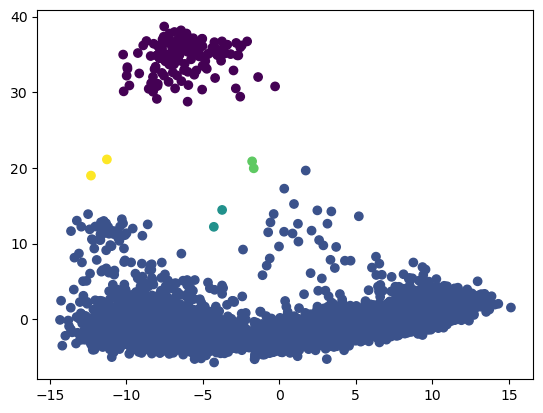

In [32]:
plt.scatter(proj[:, 0], proj[:, 1], c = clusters)
plt.legend()

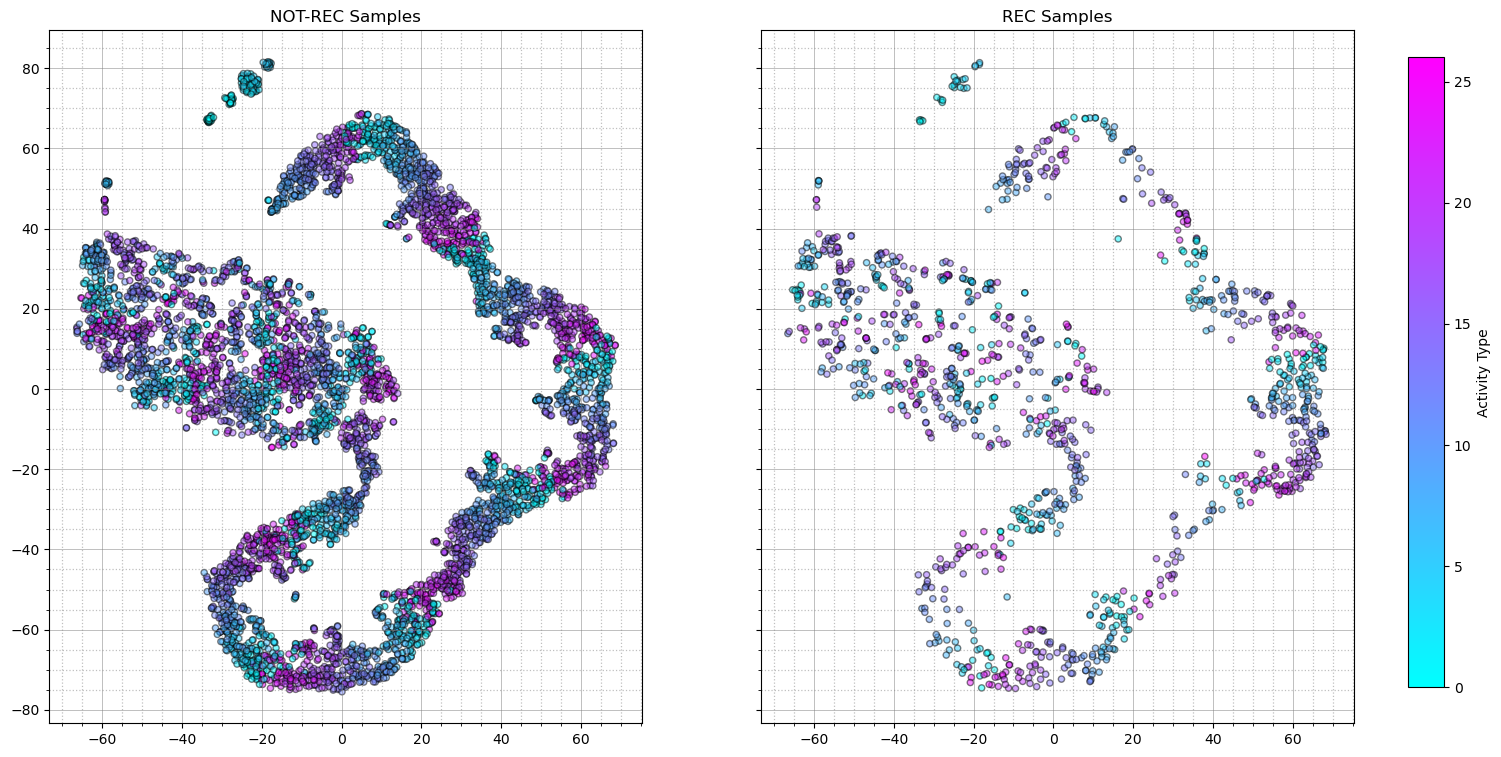

In [18]:
plot_PCA_combined_gradient(X, y)

In [ ]:
for i, e in enumerate(embedding):
    emb = []
    lab = []
    for trial_name in z.group_keys():  # или просто z.keys()
        trial = z[trial_name]
        
        labels = trial["labels"][:]
        embedding = trial["embedding"][:]
        word_list = np.unique(labels[:, 0])
        new_vector = np.copy(labels[:, 0])
        for word in word_list:
            query = np.where(np.isin(labels[:, 0], word))
            filler = query - np.min(query)
            new_vector[query] = filler
        labels = np.concatenate((labels, new_vector[:,np.newaxis]), axis = 1)
        emb.append(embedding[i])
        lab.append(labels)
        
    X = np.concatenate(emb, axis=0)
    y = np.concatenate(lab, axis=0)

    plot_PCA_combined_gradient(X, y)